In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#matplotlib.rcparams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.figsize'] = (10,6)

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height'>

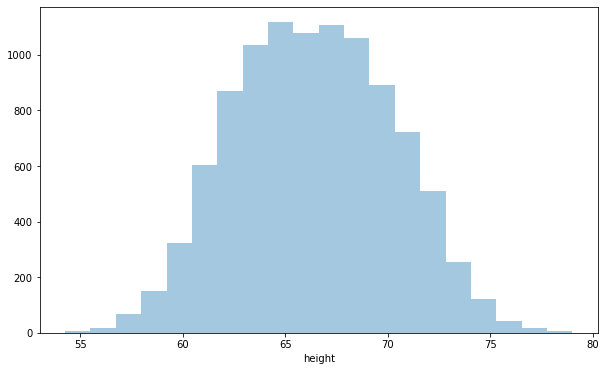

In [21]:
sns.distplot(df['height'], bins=20, kde=False)

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

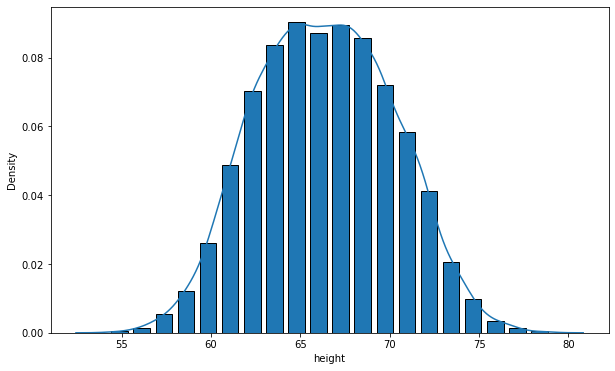

In [18]:
sns.distplot(df['height'], bins=20 , hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

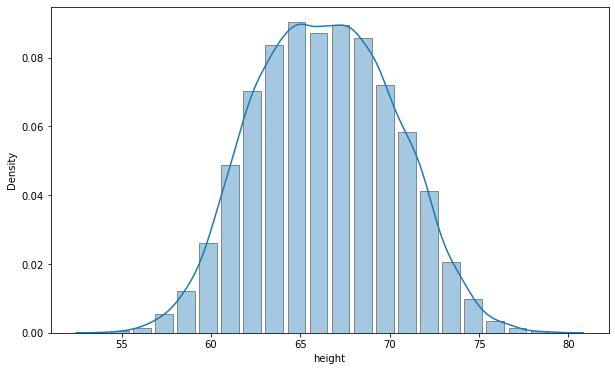

In [29]:
sns.distplot(df['height'], bins=20 , hist_kws={"rwidth":0.8,'edgecolor':'black'})

# 1   outlier removal

In [30]:
df['height'].std()

3.847528120795573

In [31]:
max_1=df['height'].mean()+(3*df['height'].std())

In [32]:
max_1

77.91014411725232

In [33]:
min_1=df['height'].mean()-(3*df['height'].std())

In [34]:
min_1

54.824975392478876

In [39]:
df[(df['height']>max_1) | (df['height']<min_1)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [40]:
df1=df[(df['height']<max_1) & (df['height']>min_1)]

In [41]:
df1

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


# outlies detection using   z-score

In [43]:
df['zscore']= (df['height']-df['height'].mean())/df['height'].std()

In [44]:
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [45]:
df2= df[(df['zscore']<3) & (df['zscore']>-3) ]

In [46]:
df2

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


# EXERCISE

In [47]:
fd= pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv')
fd.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [50]:
fd['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [48]:
low,high= fd['price_per_sqft'].quantile([0.001,0.999])

In [49]:
fd1=fd[(fd['price_per_sqft']>low) & (fd['price_per_sqft']<high)]
fd.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [51]:
fd1['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

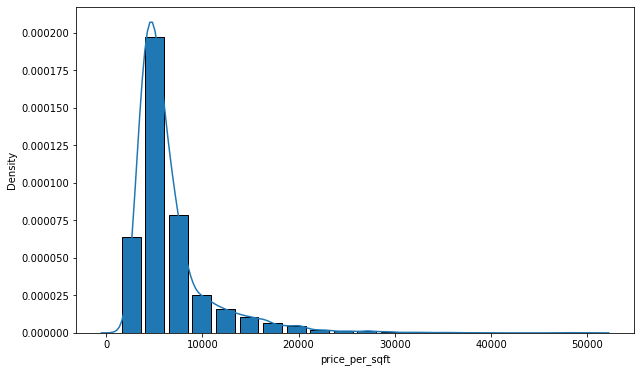

In [68]:
sns.distplot(fd1['price_per_sqft'],bins=20, hist_kws={'rwidth':0.8,'edgecolor':'black','alpha':1.0})

In [55]:
fd1['price_per_sqft'].std()

4141.020700174605

In [56]:
fd1['price_per_sqft'].mean()

6663.6537351958705

In [52]:
high1=fd1['price_per_sqft'].mean()+(4*fd1['price_per_sqft'].std())
high1

23227.73653589429

In [53]:
low1=fd1['price_per_sqft'].mean()-(4*fd1['price_per_sqft'].std())
low1

-9900.429065502549

In [57]:
6663.6537351958705-(4*4141.020700174605)

-9900.429065502549

In [59]:
fd2=fd1[(fd['price_per_sqft']<high1) & (fd['price_per_sqft']>low1)]
fd2.sample(10)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_9536\1040756945.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fd2=fd1[(fd['price_per_sqft']<high1) & (fd['price_per_sqft']>low1)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
4097,Thigalarapalya,3 BHK,2072.0,4.0,147.0,3,7094
3245,Laggere,5 Bedroom,2800.0,5.0,125.0,5,4464
1368,Raja Rajeshwari Nagar,3 BHK,1610.0,3.0,74.0,3,4596
6496,Jigani,3 BHK,1200.0,3.0,65.0,3,5416
2902,Ulsoor,2 BHK,1180.0,2.0,100.0,2,8474
11168,Hosur Road,3 BHK,1250.0,2.0,50.0,3,4000
5265,Kasavanhalli,3 BHK,1545.0,3.0,69.0,3,4466
993,Vidyaranyapura,3 BHK,1485.0,2.0,67.0,3,4511
3927,Sanjay nagar,1 BHK,965.0,1.0,32.0,1,3316
6100,Marathahalli,2 BHK,1152.0,2.0,90.0,2,7812


In [60]:
fd2.shape

(13047, 7)

In [63]:
fd1.shape[0]-fd2.shape[0]

125

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

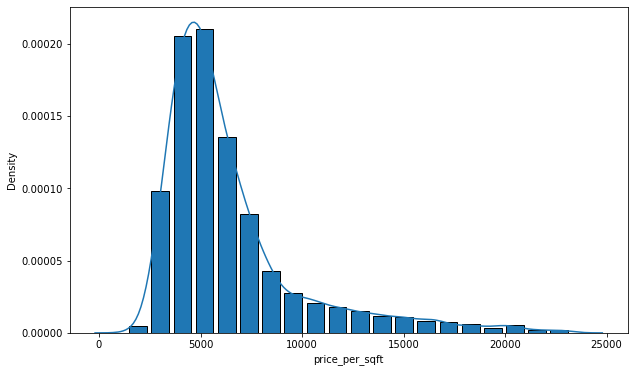

In [67]:
sns.distplot(fd2['price_per_sqft'],bins=20, hist_kws={'rwidth':0.8,'edgecolor':'black','alpha':1.0})

# BY using  Z-SCORE

In [69]:
fd1['zscore'] = (fd1['price_per_sqft']-fd1['price_per_sqft'].mean())/fd1['price_per_sqft'].std()

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_9536\1094898234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd1['zscore'] = (fd1['price_per_sqft']-fd1['price_per_sqft'].mean())/fd1['price_per_sqft'].std()


In [73]:
fd3= fd1[(fd1['zscore']<4) & (fd1['zscore']>-4)]

In [74]:
fd1.shape[0]-fd3.shape[0]

125

In [75]:
fd3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

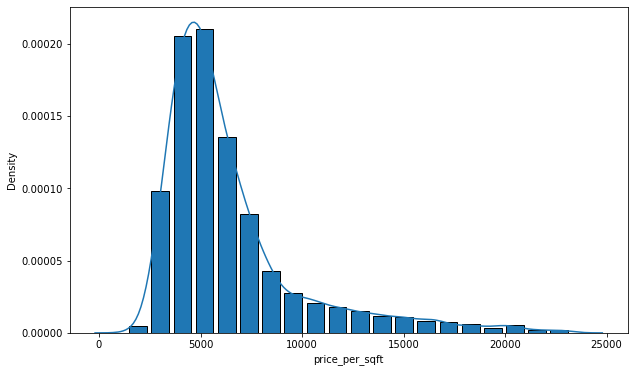

In [76]:
sns.distplot(fd3['price_per_sqft'],bins=20, hist_kws={'rwidth':0.8,'edgecolor':'black','alpha':1.0})